In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

import cv2
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [26]:
folders = ['./trashnet-resized/paper', './trashnet-resized/cardboard',
           './trashnet-resized/glass', './trashnet-resized/metal',
           './trashnet-resized/plastic', './trashnet-resized/trash']

In [27]:
# Create empty lists to store the images and labels
images_train = []
labels_train = []
images_test = []
labels_test = []

# Loop through the folders and images to populate the lists
for folder in folders:
    images = []
    labels = []
    for filename in os.listdir(folder):
        if filename.endswith('.jpg'):
            label = os.path.basename(folder)
            img = cv2.imread(os.path.join(folder, filename))
            img = cv2.resize(img, (64, 64), interpolation=cv2.INTER_AREA)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img_array = np.array(img)
            images.append(img_array.reshape(-1))
            labels.append(label)

    # Split the folder into train and test sets
    train_images, test_images, train_labels, test_labels = train_test_split(
        images, labels, test_size=0.2)
    images_train.extend(train_images)
    labels_train.extend(train_labels)
    images_test.extend(test_images)
    labels_test.extend(test_labels)

# Convert the lists to data frames
train = pd.DataFrame({'image': images_train, 'label': labels_train})
test = pd.DataFrame({'image': images_test, 'label': labels_test})

In [28]:
# Convert the train and test data and labels to numpy arrays
X_train = np.array(train['image'].tolist())
y_train = np.array(train['label'].tolist())
X_test = np.array(test['image'].tolist())
y_test = np.array(test['label'].tolist())

In [29]:
accuracy_train = []
accuracy_test = []

for i in range(1,6):   #check all possible values for 1 to 6
    k_nn = KNeighborsClassifier(n_neighbors=i, p = 1, algorithm = 'brute',
                           weights = 'distance')
    k_nn.fit(X_train,y_train)

    # Use the trained model to make predictions on the test data
    pred_i = k_nn.predict(X_test)

    accuracy_train.append(k_nn.score(X_train,y_train)*100)
    accuracy_test.append(k_nn.score(X_test,y_test)*100)

accuracy_train_array=np.asarray(accuracy_train)
accuracy_test_array=np.asarray(accuracy_test)

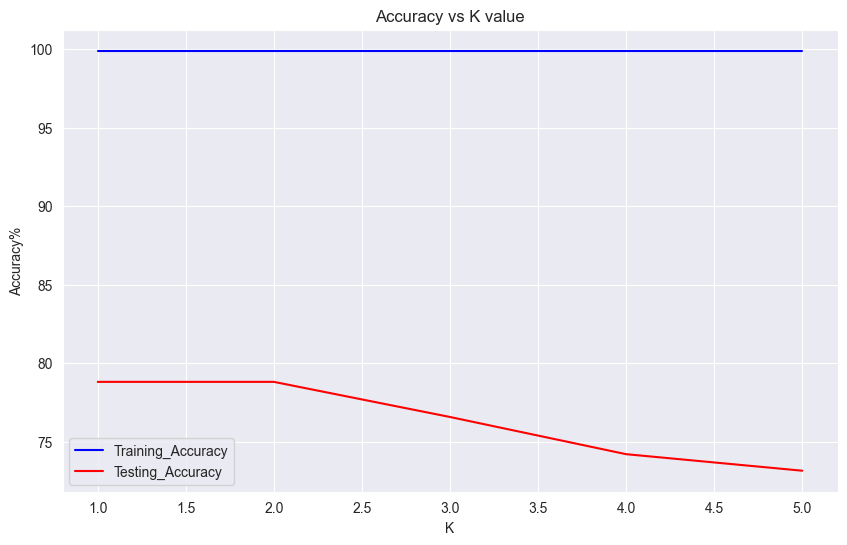

In [30]:
plt.figure(figsize=(10,6))
plt.plot(range(1,6),accuracy_train_array, label='Training_Accuracy', color='blue')
plt.plot(range(1,6),accuracy_test_array, label='Testing_Accuracy', color='red')
plt.legend()
plt.title('Accuracy vs K value')
plt.xlabel('K')
plt.ylabel('Accuracy%')

plt.show()

In [31]:
# Create a KNN classifier and fit it to the training data
knn = KNeighborsClassifier(n_neighbors=2, p = 1, algorithm = 'brute',
                           weights = 'distance')
knn.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
y_pred = knn.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {100*accuracy:.3f}%")
print(classification_report(y_test, y_pred))

Accuracy: 78.816%
              precision    recall  f1-score   support

   cardboard       0.80      0.85      0.83       121
       glass       0.79      0.68      0.73       151
       metal       0.78      0.73      0.76       123
       paper       0.92      0.81      0.86       179
     plastic       0.69      0.87      0.77       145
       trash       0.68      0.78      0.73        41

    accuracy                           0.79       760
   macro avg       0.78      0.79      0.78       760
weighted avg       0.80      0.79      0.79       760



In [32]:
conversion = {0: 'paper', 1: 'cardboard', 2: 'glass',
                      3: 'metal', 4: 'plastic', 5: 'trash'}

Text(0.5, 1.0, 'Accuracy Score: 0.7881578947368421')

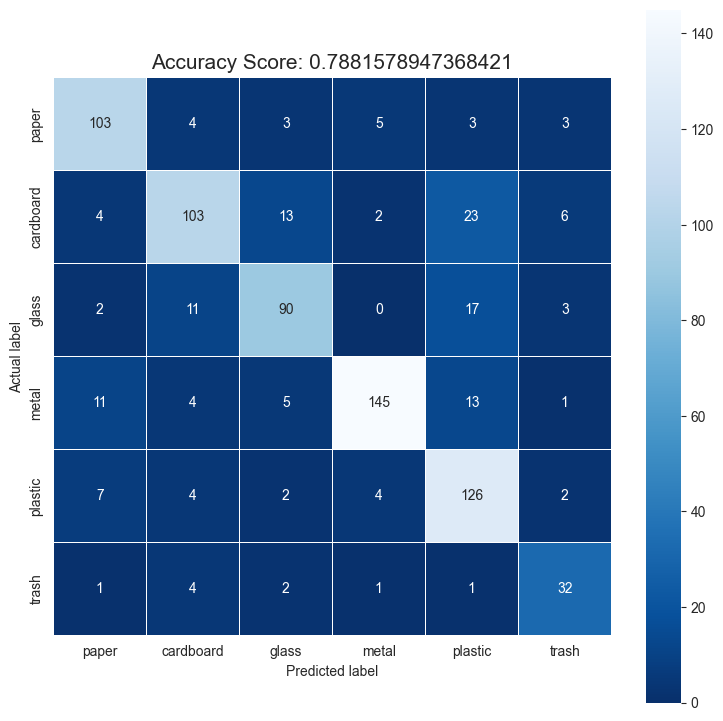

In [33]:
# Plot the confusion matrix
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True, fmt='d', linewidths=.5, square=True,cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

class_labels = [conversion[i] for i in range(len(conversion))]
plt.xticks(np.arange(len(class_labels))+0.5, class_labels)
plt.yticks(np.arange(len(class_labels))+0.5, class_labels)

all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title,size=15)